In [20]:
import pandas as pd
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [21]:
digit = load_digits()

In [22]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

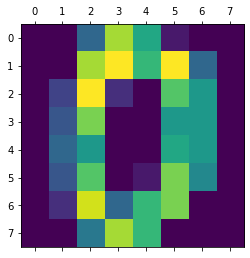

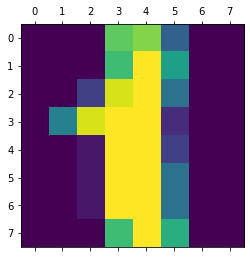

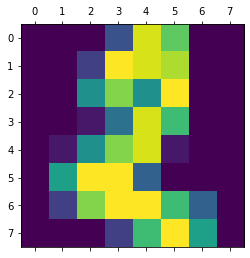

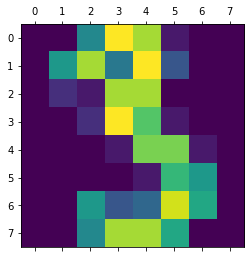

In [23]:
for i in range(4):
    plt.matshow(digit.images[i])

In [24]:
df= pd.DataFrame(digit.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [25]:
df['target']=digit.target

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [27]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis=1) , digit.target , test_size= 0.2, random_state = 0)

In [28]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

In [30]:
df1 = pd.DataFrame(X_train_lda)
df1['target'] = df['target']
df1.columns = ['LD1','LD2','Digit']
df1.head()

,LD1,LD2,Digit
0,3.678053,-0.151762,0
1,-0.895780,1.341624,1
2,-3.808197,2.110307,2
3,4.932102,-2.161233,3
4,6.127362,-1.436849,4


In [31]:
df1.tail()

,LD1,LD2,Digit
1432,-3.000342,-0.436359,7
1433,-3.566618,2.293187,8
1434,0.482370,-2.928725,9
1435,0.126428,-2.232439,0
1436,-0.958991,-0.519426,1


<Figure size 1440x1440 with 0 Axes>

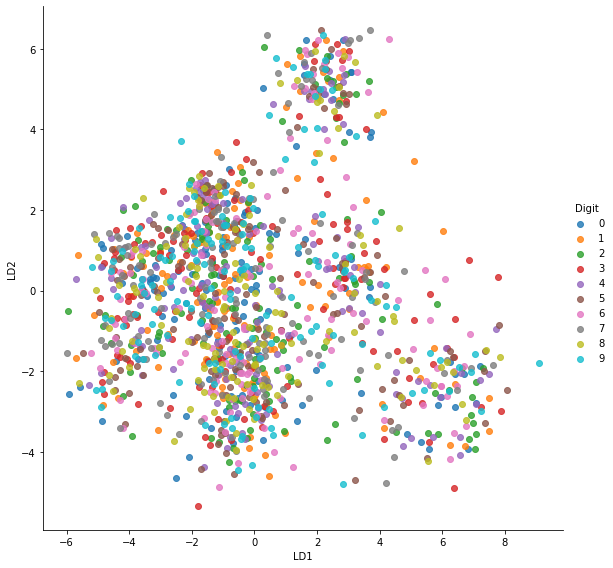

In [32]:
plt.figure(figsize = (20,20))
sns.lmplot(x="LD1" , y="LD2" , data = df1 ,hue = "Digit" , fit_reg=False, height = 8)

In [33]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train_lda,y_train)

RandomForestClassifier(n_estimators=20)

In [34]:
model.score(X_test_lda,y_test)

0.5861111111111111

In [35]:
y_predicted = model.predict(X_test_lda)

In [36]:
cm = confusion_matrix(y_test,y_predicted)

In [37]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  1,  0,  1,  0,  3,  9,  0,  1],
       [ 0,  2, 22,  9,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  4, 23,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  3,  0, 17,  3,  0,  4, 12],
       [ 0,  2,  0,  0,  2,  1, 38,  0,  0,  1],
       [ 0, 15,  0,  0,  2,  2,  2,  9,  8,  1],
       [ 0,  8,  1,  0,  0,  2,  1,  8, 16,  3],
       [ 0,  0,  1,  4,  0, 19,  0,  2,  4, 11]], dtype=int64)

In [38]:
print(accuracy_score(y_test,y_predicted))

0.5861111111111111


In [ ]:
sns.heatmap(cm,annot = True)
plt.xlable("Prediction Values")
plt.ylabel("Real Values")